In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Basic Plot

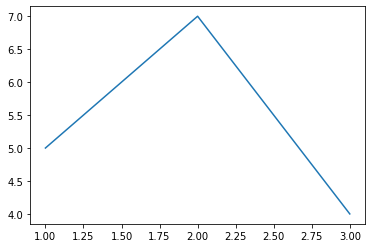

In [2]:
plt.plot([1,2,3],[5,7,4])

In [3]:
ax = plt.subplot2grid((1,1), (0,0))
ax.plot([1,2,3],[5,7,4])
ax.set_xticks([1, 2, 3])
plt.show()

In [4]:
#help(plt.subplot2grid)

# Multiple Plots

In [5]:
x = [1, 2, 3]
y = [5, 7, 4]

x2 = [1, 2, 3]
y2 = [10, 14, 12]

Text(0.5, 1.0, 'This is the title\nThe title can have more than one line.')

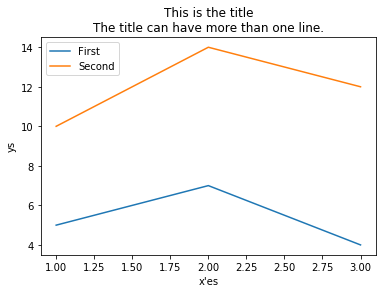

In [6]:
plt.plot(x, y, label='First')
plt.plot(x2, y2, label='Second')
plt.xlabel('x\'es')
plt.ylabel('ys')
plt.legend()
plt.title('This is the title\nThe title can have more than one line.')

# Bar Charts and Histograms

Text(0.5, 1.0, 'Bar Chart')

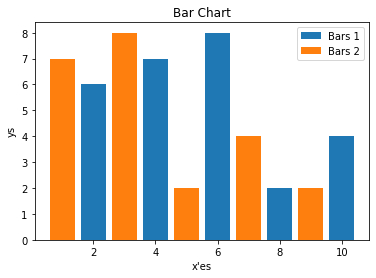

In [7]:
x = [2, 4, 6, 8 , 10]
y = [6, 7, 8, 2, 4]

x2 = [1, 3, 5, 7, 9]
y2 = [7, 8, 2, 4, 2]

plt.bar(x, y, label='Bars 1')
plt.bar(x2, y2, label='Bars 2')

plt.xlabel('x\'es')
plt.ylabel('ys')
plt.legend()
plt.title('Bar Chart')

Text(0.5, 1.0, 'Age Frequency Distribution')

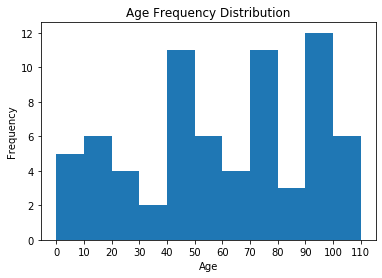

In [8]:
ages = [
    3, 4, 4, 2, 3,
    10, 14, 13, 12, 11, 12,
    22, 23, 26, 27,
    33, 31, 
    44, 42, 41, 45, 47, 48, 44, 40, 46, 46, 47,
    55, 52, 55, 53, 56, 59,
    60, 63, 64, 66,
    77, 70, 78, 78, 79, 73, 72, 79, 78, 77, 76,
    80, 88, 81,
    90, 92, 99, 94, 95, 93, 94, 90, 99, 94, 95, 96,
    100, 101, 105, 108, 107, 100
]
bins = [i*10 for i in range(0, 12)]

plt.hist(ages, bins=bins, histtype='bar')
plt.xticks(bins)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

# Scatter Plots

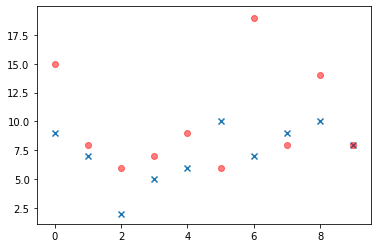

In [9]:
x = [i for i in range(10)]
y = [random.randint(0, 10) for i in range(len(x))]

y2 = [random.randint(5, 20) for i in range(len(x))]

plt.scatter(x, y, marker='x')
plt.scatter(x, y2, color='r', alpha=0.5)

# Stack Plots

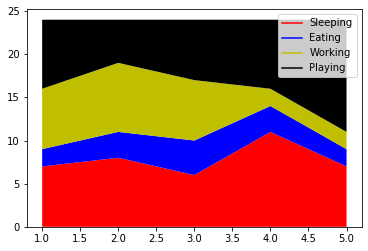

In [10]:
days = [1, 2, 3, 4, 5]
sleeping = [7, 8, 6, 11, 7]
eating = [2, 3, 4, 3, 2]
working = [7, 8, 7, 2, 2]
playing = [8, 5, 7, 8, 13]

plt.plot([], [], color='r', label="Sleeping")
plt.plot([], [], color='b', label="Eating")
plt.plot([], [], color='y', label="Working")
plt.plot([], [], color='k', label="Playing")

plt.stackplot(days, 
              sleeping, eating, working, playing,
              colors=['r', 'b', 'y', 'k']
             )

plt.legend()

# Pie Charts

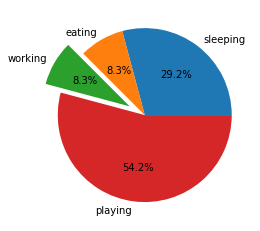

In [11]:
slices = [7, 2, 2, 13]
activities = ['sleeping', 'eating', 'working', 'playing']

plt.pie(slices, 
        labels=activities, 
        explode=(0, 0, 0.2, 0),
        autopct='%1.1f%%'
       )
plt.show()

# Reading Files

In [12]:
import csv

In [13]:
x, y = [], []

with open('example-data.csv') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
x, y

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [3, 5, 9, 7, 3, 6, 1, 2, 3, 6])

In [14]:
x, y = np.loadtxt('example-data.csv', 
                  delimiter=',', 
                  unpack=True,
                  dtype='int'
                 )
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([3, 5, 9, 7, 3, 6, 1, 2, 3, 6]))

In [15]:
df = pd.read_csv('example-data.csv', header=None)
df

0  1
0   1  3
1   2  5
2   3  9
3   4  7
4   5  3
5   6  6
6   7  1
7   8  2
8   9  3
9  10  6

In [16]:
df = pd.read_csv('example-data-with-header.csv')
df

x  y
0   1  3
1   2  5
2   3  9
3   4  7
4   5  3
5   6  6
6   7  1
7   8  2
8   9  3
9  10  6

# Reading Data from the Internet

/Users/henrik/py-env/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/henrik/py-env/datascience/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


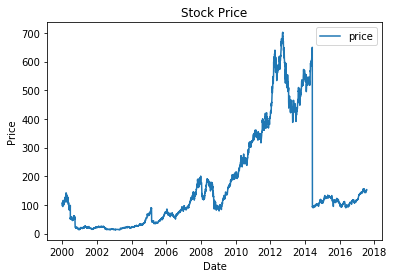

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import matplotlib.dates as mdates




def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'  
source_code = urllib.request.urlopen(stock_price_url).read().decode()   
stock_data = []
split_source = source_code.split('\n')


for line in split_source[1:]:
    stock_data.append(line)
        
Date, Open, High, Low, Close, Adjusted_Close, Volume = np.loadtxt(stock_data, delimiter=',',unpack=True, converters={0: bytespdate2num('%Y-%m-%d')})
 
plt.plot_date(Date, Open, '-', label='price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# Messing Around with Stock Prices

/Users/henrik/py-env/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  # This is added back by InteractiveShellApp.init_path()


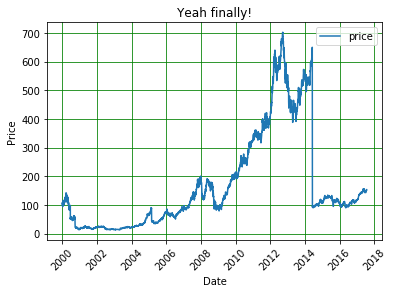

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import matplotlib.dates as mdates




def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.grid(True, color='g', linestyle='-')


stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'  
source_code = urllib.request.urlopen(stock_price_url).read().decode()   
stock_data = []
split_source = source_code.split('\n')


for line in split_source[1:]:
    stock_data.append(line)
        
Date, Open, High, Low, Close, Adjusted_Close, Volume = np.loadtxt(stock_data, delimiter=',',unpack=True, converters={0: bytespdate2num('%Y-%m-%d')})
 
ax1.plot_date(Date, Open, '-', label='price')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yeah finally!')
plt.legend()
plt.show()

In [19]:
for e in zip(Date, Open, High, Low, Close, Adjusted_Close, Volume):
    print(e)

(736536.0, 153.35, 153.93, 153.06, 153.5, 153.5, 12778195.0)
(736535.0, 151.8, 153.84, 151.8, 152.74, 152.74, 18714400.0)
(736534.0, 150.58, 152.44, 149.9, 152.09, 152.09, 21304700.0)
(736531.0, 149.99, 150.44, 148.88, 150.27, 150.27, 26252630.0)
(736530.0, 151.5, 151.74, 150.19, 150.34, 150.34, 17243748.0)
(736529.0, 150.48, 151.42, 149.95, 151.02, 151.02, 20922969.0)
(736528.0, 149.2, 150.13, 148.67, 150.08, 150.08, 17868792.0)
(736527.0, 148.82, 150.9, 148.57, 149.56, 149.56, 23243713.0)
(736524.0, 147.97, 149.33, 147.33, 149.04, 149.04, 20132061.0)
(736523.0, 145.5, 148.49, 145.44, 147.77, 147.77, 25199373.0)
(736522.0, 145.87, 146.18, 144.82, 145.74, 145.74, 24884478.0)
(736521.0, 144.73, 145.85, 144.38, 145.53, 145.53, 19781836.0)
(736520.0, 144.11, 145.95, 143.37, 145.06, 145.06, 21090636.0)
(736517.0, 142.9, 144.75, 142.9, 144.18, 144.18, 19201712.0)
(736516.0, 143.02, 143.5, 142.41, 142.73, 142.73, 24128782.0)
(736515.0, 143.69, 144.79, 142.72, 144.09, 144.09, 21569557.0)
(736

(733871.0, 241.43, 241.89, 240.46, 241.79, 31.1995, 11935100.0)
(733870.0, 240.44, 241.54, 238.04, 239.95, 30.962, 20463900.0)
(733869.0, 239.72, 241.92, 238.6601, 240.6, 31.0459, 22446500.0)
(733868.0, 238.2, 240.24, 237.0, 239.54, 30.9091, 15964900.0)
(733867.0, 234.975, 238.51, 234.77, 238.49, 30.7736, 24446700.0)
(733863.0, 237.49, 238.73, 232.75, 235.97, 30.4485, 21540900.0)
(733862.0, 235.49, 236.61, 234.46, 235.0, 30.3233, 15380700.0)
(733861.0, 236.6027, 237.48, 234.25, 235.845, 30.4323, 18832500.0)
(733860.0, 233.0, 233.8699, 231.62, 232.39, 29.9865, 19312300.0)
(733857.0, 228.95, 231.95, 228.55, 230.9, 29.7943, 22888400.0)
(733856.0, 230.458, 230.97, 226.25, 226.65, 29.2459, 19367300.0)
(733855.0, 227.64, 230.2, 227.51, 229.37, 29.5968, 21349300.0)
(733854.0, 225.64, 228.78, 224.1, 228.36, 29.4665, 21515400.0)
(733853.0, 220.47, 226.0, 220.15, 224.75, 29.0007, 16300700.0)
(733850.0, 224.79, 225.24, 221.23, 222.2499, 28.6781, 19980200.0)
(733849.0, 224.1, 225.0, 222.61, 224.65

(731697.0, 27.58, 27.635, 27.0, 27.13, 1.7504, 4127300.0)
(731694.0, 27.7, 28.0, 27.05, 27.7, 1.7871, 5639800.0)
(731693.0, 27.56, 28.18, 27.11, 27.78, 1.7923, 6153300.0)
(731692.0, 27.6, 28.12, 27.37, 27.73, 1.7891, 5819200.0)
(731691.0, 28.21, 28.41, 27.56, 27.73, 1.7891, 6330700.0)
(731690.0, 28.12, 28.75, 27.83, 28.35, 1.8291, 12720600.0)
(731687.0, 29.07, 29.31, 28.5, 29.18, 1.8826, 7195200.0)
(731686.0, 29.0, 29.58, 28.16, 29.3, 1.8904, 31454400.0)
(731685.0, 26.74, 27.07, 26.31, 26.64, 1.7188, 11423800.0)
(731684.0, 28.0, 28.03, 26.84, 26.93, 1.7375, 7792800.0)
(731683.0, 27.5, 28.1, 27.49, 28.04, 1.8091, 4116800.0)
(731679.0, 27.9, 28.0, 27.2, 27.53, 1.7762, 4302100.0)
(731678.0, 27.62, 27.7, 26.92, 27.31, 1.762, 4555700.0)
(731677.0, 27.74, 28.15, 27.43, 27.83, 1.7955, 4607000.0)
(731676.0, 27.48, 28.37, 27.44, 28.32, 1.8271, 6887000.0)
(731673.0, 27.74, 27.93, 27.23, 27.5, 1.7742, 4901400.0)
(731672.0, 26.9, 27.27, 26.62, 27.11, 1.7491, 5684500.0)
(731671.0, 27.86, 27.98, 26.

In [20]:
stock_data

['2017-07-26,153.3500,153.9300,153.0600,153.5000,153.5000,12778195.00',
 '2017-07-25,151.8000,153.8400,151.8000,152.7400,152.7400,18714400.00',
 '2017-07-24,150.5800,152.4400,149.9000,152.0900,152.0900,21304700.00',
 '2017-07-21,149.9900,150.4400,148.8800,150.2700,150.2700,26252630.00',
 '2017-07-20,151.5000,151.7400,150.1900,150.3400,150.3400,17243748.00',
 '2017-07-19,150.4800,151.4200,149.9500,151.0200,151.0200,20922969.00',
 '2017-07-18,149.2000,150.1300,148.6700,150.0800,150.0800,17868792.00',
 '2017-07-17,148.8200,150.9000,148.5700,149.5600,149.5600,23243713.00',
 '2017-07-14,147.9700,149.3300,147.3300,149.0400,149.0400,20132061.00',
 '2017-07-13,145.5000,148.4900,145.4400,147.7700,147.7700,25199373.00',
 '2017-07-12,145.8700,146.1800,144.8200,145.7400,145.7400,24884478.00',
 '2017-07-11,144.7300,145.8500,144.3800,145.5300,145.5300,19781836.00',
 '2017-07-10,144.1100,145.9500,143.3700,145.0600,145.0600,21090636.00',
 '2017-07-07,142.9000,144.7500,142.9000,144.1800,144.1800,192017

In [21]:
df = pd.DataFrame(map(lambda x: x.split(','), stock_data))
df.shape

(4419, 7)

In [22]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted_Close', 'Volume']

In [23]:
df

Date      Open      High       Low     Close Adjusted_Close  \
0     2017-07-26  153.3500  153.9300  153.0600  153.5000       153.5000   
1     2017-07-25  151.8000  153.8400  151.8000  152.7400       152.7400   
2     2017-07-24  150.5800  152.4400  149.9000  152.0900       152.0900   
3     2017-07-21  149.9900  150.4400  148.8800  150.2700       150.2700   
4     2017-07-20  151.5000  151.7400  150.1900  150.3400       150.3400   
...          ...       ...       ...       ...       ...            ...   
4414  2000-01-07   96.5000  101.0000   95.5000   99.5000         3.2098   
4415  2000-01-06  106.1200  107.0000   95.0000   95.0000         3.0646   
4416  2000-01-05  103.7500  110.5600  103.0000  104.0000         3.3549   
4417  2000-01-04  108.2500  110.6200  101.1900  102.5000         3.3065   
4418  2000-01-03  104.8700  112.5000  101.6900  111.9400         3.6111   

           Volume  
0     12778195.00  
1     18714400.00  
2     21304700.00  
3     26252630.00  
4     17243748.00  
...           ...  
4414   4113700.00  
4415   6856900.00  
4416   6949300.00  
4417   4574800.00  
4418   4783900.00  

[4419 rows x 7 columns]

# Gain and Loss

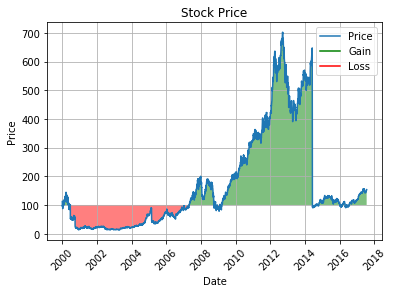

In [24]:
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.plot_date(Date, Close, '-', label='Price')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
ax2.grid(True)

ax2.plot([], [], color='g', label='Gain')
ax2.plot([], [], color='r', label='Loss')

ax2.fill_between(Date, Close, 100, where=(Close > 100), facecolor='g', alpha=0.5)
ax2.fill_between(Date, Close, 100, where=(Close < 100), facecolor='r', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# Customizing Charts

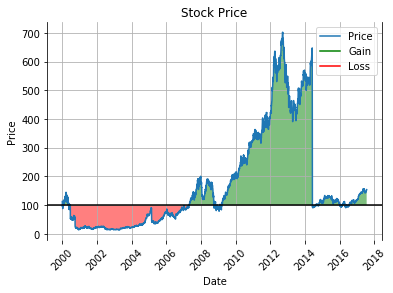

In [25]:
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.plot_date(Date, Close, '-', label='Price')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
ax2.grid(True)

ax2.spines['left'].set_color('#060606')
ax2.spines['right'].set_color('#060606')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.axhline(100, color='k')

ax2.plot([], [], color='g', label='Gain')
ax2.plot([], [], color='r', label='Loss')

ax2.fill_between(Date, Close, 100, where=(Close > 100), facecolor='g', alpha=0.5)
ax2.fill_between(Date, Close, 100, where=(Close < 100), facecolor='r', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# More about Matplotlib

This tutorial should be completed individually by each student:

- https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

If you are hungry for more, take a look at this:

-  https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

If you have nothing better to do, you can look at this:

- https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py
- https://matplotlib.org/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py